<a href="https://colab.research.google.com/github/JoshuaYosen/Handwriting_Recognition/blob/master/Handwriting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT DESCRIPTION**

The intent of this project is to write a program that can classify a handwritten number. This will be done using the K Means Algorithm as a use of Unsupervised Machine Learning.

In [3]:
import seaborn
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

#dataset of handwritten digits
digits = datasets.load_digits()

#print(digits.target) to view data

print(digits.DESCR) 


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

Above we load our necessary modules for graphing and the necessary dataset and algorithms within sci-kit.

We have also printed out a general description of the dataset to get a good idea of what we will be working with.

<Figure size 576x396 with 0 Axes>

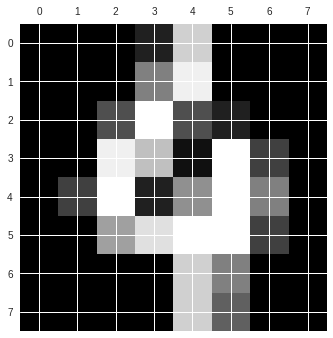

4


In [4]:
plt.gray()
plt.matshow(digits.images[100])
plt.show()
print(digits.target[100])



Above we have generated a gray scale image example of what one of the handwritten images might appear like. Although blurry, one can make out that this is the number 4. As this is part of an already classified data set, we can make sure that is indeed:

In [6]:
print(digits.target[100])

4


Now we can start building our algorithm

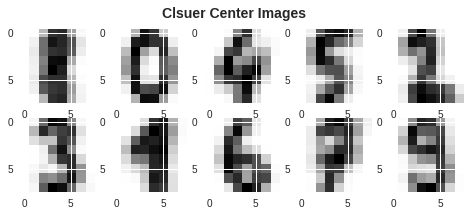

In [7]:
#creating an instance of KMeans and fitting to model
model = KMeans(n_clusters=10, random_state=45)
model.fit(digits.data)

fig = plt.figure(figsize=(8, 3))
fig.suptitle("Clsuer Center Images", fontsize=14, fontweight='bold')

for i in range(10):

  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)

  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.show()



Now that we have our algorithm, we can test it

In [8]:
#our algorithms prediction for the number 2025
new_samples = np.array([
[0.00,0.00,0.00,2.19,3.05,0.69,0.00,0.00,0.00,0.84,6.61,7.62,7.62,4.95,0.00,0.00,0.00,0.54,4.49,3.26,7.01,4.95,0.00,0.00,0.00,0.00,0.00,3.05,7.62,2.66,0.00,0.00,0.00,0.00,0.99,7.24,5.94,0.08,0.00,0.00,0.00,0.22,6.24,7.62,4.04,3.04,3.04,1.99,0.00,1.14,7.54,7.62,7.62,7.62,7.62,5.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.53,3.04,2.44,0.38,0.00,0.00,0.00,0.45,6.47,7.62,7.62,5.55,0.00,0.00,0.00,3.94,7.61,2.43,3.57,7.62,3.89,0.00,0.00,5.33,5.86,0.00,0.08,5.11,7.39,0.38,0.00,5.26,6.10,0.00,0.00,2.67,7.62,0.76,0.00,3.50,7.61,5.25,1.97,4.87,7.31,0.15,0.00,0.23,4.33,7.39,7.62,7.62,4.49,0.00,0.00,0.00,0.00,0.52,2.13,2.20,0.22,0.00],
[0.00,2.28,3.04,3.04,1.29,0.00,0.00,0.00,1.28,7.62,7.60,7.61,6.02,0.00,0.00,0.00,1.83,7.39,2.05,6.54,5.71,0.00,0.00,0.00,0.00,0.00,2.13,7.62,3.35,0.00,0.00,0.00,0.00,1.14,7.01,6.56,0.30,0.00,0.00,0.00,0.43,6.85,7.62,6.25,5.48,6.93,7.01,0.99,0.38,5.86,6.10,5.87,5.33,5.02,3.95,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,1.14,2.13,2.13,1.51,0.84,0.00,0.00,1.82,7.61,7.62,7.62,7.62,5.95,0.00,0.00,1.98,7.61,4.79,2.04,2.28,1.14,0.00,0.00,0.39,6.47,7.62,7.46,4.57,0.08,0.00,0.00,0.00,0.15,1.96,5.16,7.62,3.34,0.00,0.00,0.00,0.00,0.91,4.56,7.62,4.34,0.00,0.00,0.00,0.00,4.35,7.47,4.79,0.45,0.00,0.00,0.00,0.00,0.22,0.53,0.00,0.00,0.00]
])

#employing predict model on our algorithms 2025 prediction
new_labels = model.predict(new_samples)

#labeling images to numbers
for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')

0954

Our number was way off! Technically our algorithm worked. It identified from a dataset some numbers and was able to generate some numbers on a novel piece of data. However, it was wildly inaccuarate. 

Most likely the data set is too small and not varied enough with different types of handwriting. Because this is an Unsupervised Machine Learning technique, general accuracy will always be lower than Supervised Machine Learning.

KMeans is simple, and with enough data accuracy will be higher. However, more sophisticated techniques using deep neural networks is probably the best solution for most Unsupervised Machine Learning. 